In [53]:
import pandas as pd
import string
import re
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [55]:
data = pd.read_csv('Language_Detection.csv')
df = data


In [56]:
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [57]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [58]:
df[df.Language == 'Turkish'].sample(10)

,Text,Language
8065,Anadili İngilizce olanların kullandıkları başk...,Turkish
8114,orada bir yerde kırmızı bir düğme olması harik...,Turkish
7909,Bu durum Yankovic hayranlarının sayfayı yoğun ...,Turkish
8091,ve onlar sanki aynı şeyi satın almak istiyorum...,Turkish
7928,biri boğulma veya su basması anlamına gelir an...,Turkish
8124,Uzun zamandır görüşemedik.,Turkish
8210,seni eve bırakmamı ister misin?,Turkish
8073,"Bu yanıyor, bu da Kaliforniya'da birçok Amerik...",Turkish
8027,Birinden üzülmemesini rica edersen ağlamasın d...,Turkish
7854,"Her dil Vikipedisine, o dili bilen herkesin ka...",Turkish


In [59]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [60]:
X = data["Text"]
y = data["Language"]

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [62]:
data_list = []

for text in X:         
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)      
    text = re.sub(r'[[]]', ' ', text)   
    text = text.lower()          
    data_list.append(text)     

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape # (10337, 39419)

(10337, 34937)

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [65]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [66]:
y_pred = model.predict(x_test)


In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


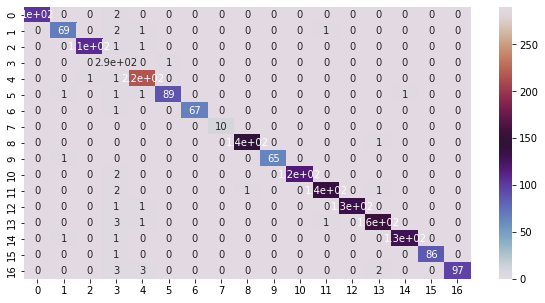

In [92]:
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot = True, cmap = "twilight")
plt.show()

In [69]:
def predict(text):
     x = cv.transform([text]).toarray() 
     lang = model.predict(x) 
     lang = le.inverse_transform(lang) 
     print("The langauge is in",lang[0]) 

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)


In [71]:
print("Accuracy is :",ac)

Accuracy is : 0.9796905222437138


In [72]:
print(cr)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       106
           1       0.96      0.95      0.95        73
           2       0.99      0.98      0.99       111
           3       0.93      1.00      0.96       291
           4       0.96      0.99      0.98       219
           5       0.99      0.96      0.97        93
           6       1.00      0.99      0.99        68
           7       1.00      1.00      1.00        10
           8       0.99      0.99      0.99       145
           9       1.00      0.98      0.99        66
          10       1.00      0.98      0.99       121
          11       0.99      0.97      0.98       144
          12       1.00      0.99      0.99       136
          13       0.97      0.97      0.97       160
          14       0.99      0.98      0.99       133
          15       1.00      0.99      0.99        87
          16       1.00      0.92      0.96       105

    accuracy              

In [74]:
predict ("guess this language")

The langauge is in English


In [93]:
predict ("bu dili tahmin et")

The langauge is in Turkish


In [95]:
predict ("भाषा का पता लगाने वाले मॉडल की जांच")

The langauge is in Hindi


In [96]:
predict ("ПРОВЕРКА МОДЕЛИ ОПРЕДЕЛЕНИЯ ЯЗЫКА")

The langauge is in Russian
